In [1]:
# Import PyTorch
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device
# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(
    f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}"
)

/home/digivjay/miniconda3/envs/steelmint_3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version: 1.12.1
torchvision version: 0.13.1


In [2]:
import requests
import zipfile
from pathlib import Path

image_path = Path("Grade_wise_scrap_photos")


In [3]:
import os


def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
      dir_path (str or pathlib.Path): target directory

    Returns:
      A print out of:
        number of subdiretories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(
            f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
        )

In [4]:
walk_through_dir(image_path)

There are 24 directories and 0 images in 'Grade_wise_scrap_photos'.
There are 0 directories and 15 images in 'Grade_wise_scrap_photos/Cast_Iron_Briquettes'.
There are 0 directories and 15 images in 'Grade_wise_scrap_photos/New_Black_Bales'.
There are 0 directories and 15 images in 'Grade_wise_scrap_photos/Railway_Axels'.
There are 0 directories and 11 images in 'Grade_wise_scrap_photos/pns'.
There are 0 directories and 13 images in 'Grade_wise_scrap_photos/Manganese_Scrap'.
There are 0 directories and 6 images in 'Grade_wise_scrap_photos/Cast_Iron_Boring'.
There are 0 directories and 15 images in 'Grade_wise_scrap_photos/Mic_Railway_Scrap'.
There are 0 directories and 19 images in 'Grade_wise_scrap_photos/Used_Beverage_Can_Bales'.
There are 0 directories and 22 images in 'Grade_wise_scrap_photos/lms'.
There are 0 directories and 38 images in 'Grade_wise_scrap_photos/HMS_1'.
There are 0 directories and 24 images in 'Grade_wise_scrap_photos/Shredded'.
There are 0 directories and 32 image

Random image path: Grade_wise_scrap_photos/Railway_Axels/8.jpg
Image class: Railway_Axels
Image height: 598
Image width: 797


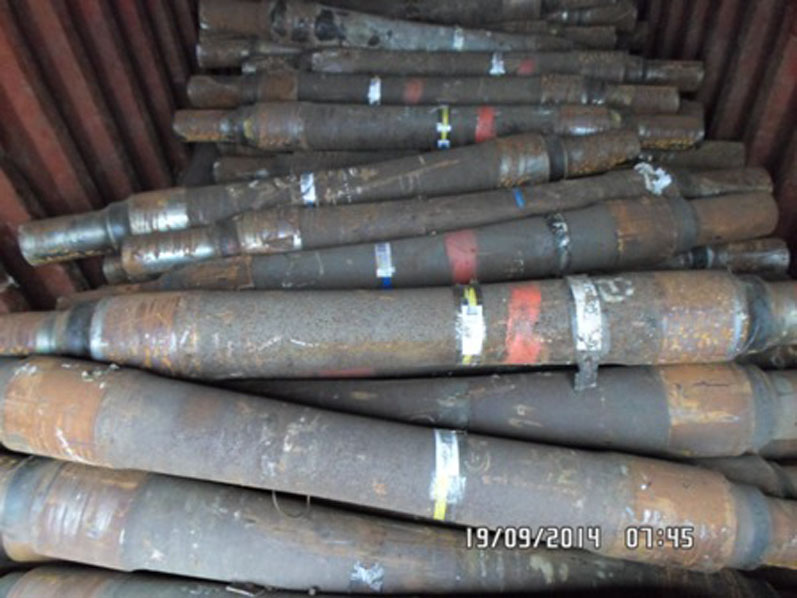

In [5]:
import random
from PIL import Image
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True # Solves a error

image_path_list = list(image_path.glob("*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [6]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [7]:
# Transformer for image

data_transform = transforms.Compose(
    [
        transforms.Resize(size=(640, 640)),
        transforms.RandomHorizontalFlip(
            p=0.5
        ),
        transforms.ToTensor(),
    ]
)


# data_transform = transforms.Compose(
#     [
#         transforms.Resize((620, 640)),
#         transforms.TrivialAugmentWide(num_magnitude_bins=31),
#         transforms.ToTensor(),
#     ]
# )

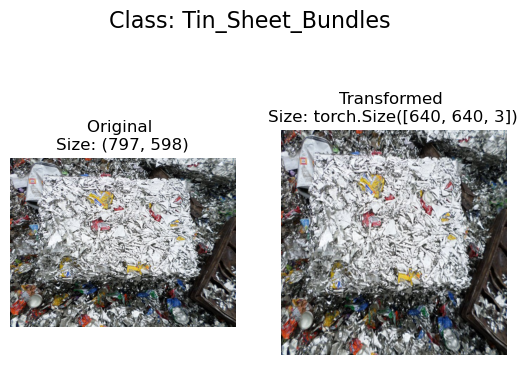

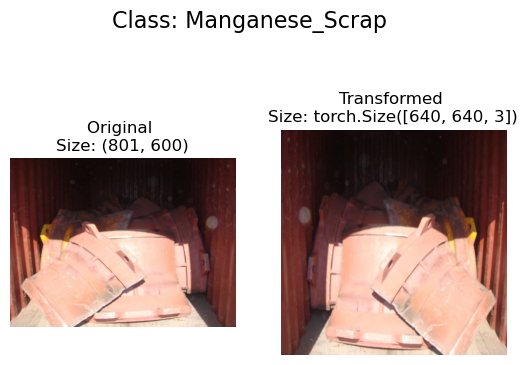

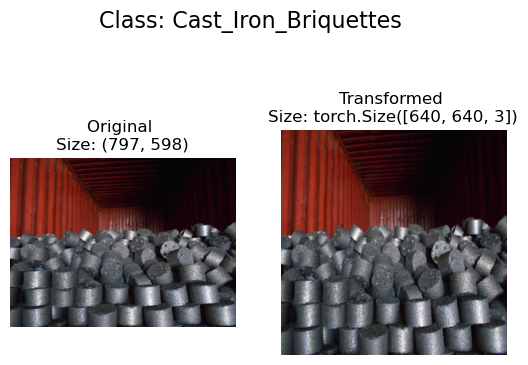

In [8]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            transformed_image = transform(f).permute(1, 2, 0) # (c, h, w)[PyTorch] -> (h, w, c)[Matplotlib]
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, transform=data_transform, n=3)

In [9]:
from torchvision import datasets

train_data = datasets.ImageFolder(
    root=image_path,
    transform=data_transform,
)
print(f"Train data:\n{train_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 473
    Root location: Grade_wise_scrap_photos
    StandardTransform
Transform: Compose(
               Resize(size=(640, 640), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [10]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_dict

{'Alternators': 0,
 'Auto_Factory_Bales': 1,
 'Blue_Steel': 2,
 'Cast_Iron_Boring': 3,
 'Cast_Iron_Briquettes': 4,
 'Grinding_Media': 5,
 'HMS 80_20': 6,
 'HMS_1': 7,
 'Manganese_Scrap': 8,
 'Mic_Railway_Scrap': 9,
 'New_Black_Bales': 10,
 'Railway_Axels': 11,
 'Railway_Lines': 12,
 'Railway_Wheels': 13,
 'Rolling_Scrap': 14,
 'Shredded': 15,
 'Tin_Can_Shredded_Scrap': 16,
 'Tin_Plate_Sheet_Scrap': 17,
 'Tin_Sheet_Bundles': 18,
 'Used_Beverage_Can_Bales': 19,
 'Wire_Bales': 20,
 'lms': 21,
 'pns': 22,
 'turning_boring': 23}

In [11]:
len(train_data), len(class_names)

(473, 24)

Image tensor:
tensor([[[0.8549, 0.8510, 0.8510,  ..., 0.8941, 0.8941, 0.8941],
         [0.8549, 0.8510, 0.8510,  ..., 0.8941, 0.8941, 0.8941],
         [0.8549, 0.8510, 0.8510,  ..., 0.8941, 0.8941, 0.8941],
         ...,
         [0.0824, 0.0902, 0.0902,  ..., 0.5176, 0.5333, 0.5608],
         [0.0863, 0.0941, 0.0941,  ..., 0.4863, 0.5020, 0.5255],
         [0.0784, 0.0863, 0.0863,  ..., 0.4549, 0.4667, 0.4863]],

        [[0.8627, 0.8588, 0.8588,  ..., 0.9020, 0.9020, 0.9020],
         [0.8627, 0.8588, 0.8588,  ..., 0.9020, 0.9020, 0.9020],
         [0.8627, 0.8588, 0.8588,  ..., 0.9020, 0.9020, 0.9020],
         ...,
         [0.1059, 0.1137, 0.1137,  ..., 0.4706, 0.4863, 0.5137],
         [0.1098, 0.1176, 0.1176,  ..., 0.4392, 0.4549, 0.4784],
         [0.1020, 0.1098, 0.1098,  ..., 0.4078, 0.4196, 0.4392]],

        [[0.8588, 0.8549, 0.8549,  ..., 0.8980, 0.8980, 0.8980],
         [0.8588, 0.8549, 0.8549,  ..., 0.8980, 0.8980, 0.8980],
         [0.8588, 0.8549, 0.8549,  ..., 0.89

Text(0.5, 1.0, 'Alternators')

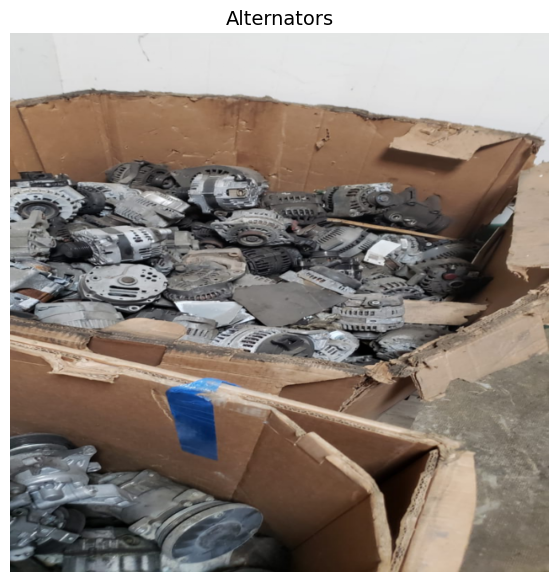

In [12]:
# Test 1 Image
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32, 
    num_workers=1,
    shuffle=True,
) 


In [14]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 640, 640]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [15]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,  # how big is the square that's going over the image?
                stride=1,  # default
                padding=1,
            ),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2, stride=2
            ),  # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units * 160 * 160, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion


torch.manual_seed(42)
model_0 = TinyVGG(
    input_shape=3,  # number of color channels (3 for RGB)
    hidden_units=10,
    output_shape=len(train_data.classes),
).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256000, out_features=24, bias=True)
  )
)

In [16]:
from torchinfo import summary

summary(model_0, input_size=[32, 3, 640, 640])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 24]                  --
├─Sequential: 1-1                        [32, 10, 320, 320]        --
│    └─Conv2d: 2-1                       [32, 10, 640, 640]        280
│    └─ReLU: 2-2                         [32, 10, 640, 640]        --
│    └─Conv2d: 2-3                       [32, 10, 640, 640]        910
│    └─ReLU: 2-4                         [32, 10, 640, 640]        --
│    └─MaxPool2d: 2-5                    [32, 10, 320, 320]        --
├─Sequential: 1-2                        [32, 10, 160, 160]        --
│    └─Conv2d: 2-6                       [32, 10, 320, 320]        910
│    └─ReLU: 2-7                         [32, 10, 320, 320]        --
│    └─Conv2d: 2-8                       [32, 10, 320, 320]        910
│    └─ReLU: 2-9                         [32, 10, 320, 320]        --
│    └─MaxPool2d: 2-10                   [32, 10, 160, 160]        --
├─Sequentia

In [17]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 640, 640])

Output logits:
tensor([[-0.0103, -0.0403,  0.0377, -0.0586, -0.0044, -0.0183,  0.0369,  0.0182,
         -0.0631, -0.0177, -0.0019,  0.0445,  0.0597, -0.0372, -0.0752, -0.0518,
          0.0414, -0.0060,  0.0471, -0.0631, -0.0315, -0.0143,  0.0465, -0.0120]],
       device='cuda:0')

Output prediction probabilities:
tensor([[0.0415, 0.0403, 0.0435, 0.0395, 0.0418, 0.0412, 0.0435, 0.0427, 0.0394,
         0.0412, 0.0419, 0.0438, 0.0445, 0.0404, 0.0389, 0.0398, 0.0437, 0.0417,
         0.0440, 0.0394, 0.0406, 0.0413, 0.0439, 0.0414]], device='cuda:0')

Output prediction label:
tensor([12], device='cuda:0')

Actual label:
23


In [18]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [19]:
from tqdm.auto import tqdm


def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5,
):

    results = {"train_loss": [], "train_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
        )
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} "
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
    
    return results

In [20]:
NUM_EPOCHS = 50

model_0 = TinyVGG(
    input_shape=3,  # number of color channels (3 for RGB)
    hidden_units=10,
    output_shape=len(train_data.classes),
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)


model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
)



  2%|▏         | 1/50 [00:07<06:20,  7.76s/it]

Epoch: 1 | train_loss: 8.6178 | train_acc: 0.0693 


  4%|▍         | 2/50 [00:15<06:10,  7.73s/it]

Epoch: 2 | train_loss: 3.2199 | train_acc: 0.1169 


  6%|▌         | 3/50 [00:23<06:08,  7.83s/it]

Epoch: 3 | train_loss: 3.0569 | train_acc: 0.1883 


  8%|▊         | 4/50 [00:31<06:06,  7.97s/it]

Epoch: 4 | train_loss: 2.9524 | train_acc: 0.1878 


 10%|█         | 5/50 [00:39<06:00,  8.00s/it]

Epoch: 5 | train_loss: 2.8870 | train_acc: 0.1878 


 12%|█▏        | 6/50 [00:48<05:57,  8.12s/it]

Epoch: 6 | train_loss: 2.8063 | train_acc: 0.2041 


 14%|█▍        | 7/50 [00:56<05:52,  8.19s/it]

Epoch: 7 | train_loss: 2.6725 | train_acc: 0.2378 


 16%|█▌        | 8/50 [01:04<05:44,  8.21s/it]

Epoch: 8 | train_loss: 2.5099 | train_acc: 0.2737 


 18%|█▊        | 9/50 [01:12<05:38,  8.26s/it]

Epoch: 9 | train_loss: 2.4044 | train_acc: 0.3181 


 20%|██        | 10/50 [01:21<05:32,  8.31s/it]

Epoch: 10 | train_loss: 2.2797 | train_acc: 0.3427 


 22%|██▏       | 11/50 [01:31<05:41,  8.76s/it]

Epoch: 11 | train_loss: 1.9816 | train_acc: 0.4436 


 24%|██▍       | 12/50 [01:41<05:51,  9.25s/it]

Epoch: 12 | train_loss: 1.7990 | train_acc: 0.4728 


 26%|██▌       | 13/50 [01:50<05:43,  9.29s/it]

Epoch: 13 | train_loss: 1.5280 | train_acc: 0.5627 


 28%|██▊       | 14/50 [02:01<05:45,  9.60s/it]

Epoch: 14 | train_loss: 1.3675 | train_acc: 0.6233 


 30%|███       | 15/50 [02:11<05:43,  9.82s/it]

Epoch: 15 | train_loss: 1.0916 | train_acc: 0.6805 


 32%|███▏      | 16/50 [02:21<05:31,  9.74s/it]

Epoch: 16 | train_loss: 0.8261 | train_acc: 0.7873 


 34%|███▍      | 17/50 [02:30<05:18,  9.67s/it]

Epoch: 17 | train_loss: 0.6822 | train_acc: 0.8194 


 36%|███▌      | 18/50 [02:40<05:11,  9.73s/it]

Epoch: 18 | train_loss: 0.6286 | train_acc: 0.8352 


 38%|███▊      | 19/50 [02:50<05:08,  9.94s/it]

Epoch: 19 | train_loss: 0.4966 | train_acc: 0.8774 


 40%|████      | 20/50 [03:01<05:00, 10.03s/it]

Epoch: 20 | train_loss: 0.4395 | train_acc: 0.8706 


 42%|████▏     | 21/50 [03:11<04:51, 10.06s/it]

Epoch: 21 | train_loss: 0.2825 | train_acc: 0.9271 


 44%|████▍     | 22/50 [03:21<04:46, 10.23s/it]

Epoch: 22 | train_loss: 0.1792 | train_acc: 0.9625 


 46%|████▌     | 23/50 [03:31<04:32, 10.10s/it]

Epoch: 23 | train_loss: 0.1514 | train_acc: 0.9488 


 48%|████▊     | 24/50 [03:41<04:21, 10.08s/it]

Epoch: 24 | train_loss: 0.1796 | train_acc: 0.9723 


 50%|█████     | 25/50 [03:52<04:15, 10.21s/it]

Epoch: 25 | train_loss: 0.1277 | train_acc: 0.9771 


 52%|█████▏    | 26/50 [04:02<04:07, 10.31s/it]

Epoch: 26 | train_loss: 0.1207 | train_acc: 0.9500 


 54%|█████▍    | 27/50 [04:14<04:05, 10.68s/it]

Epoch: 27 | train_loss: 0.1186 | train_acc: 0.9780 


 56%|█████▌    | 28/50 [04:25<03:55, 10.71s/it]

Epoch: 28 | train_loss: 0.1863 | train_acc: 0.9593 


 58%|█████▊    | 29/50 [04:36<03:50, 10.98s/it]

Epoch: 29 | train_loss: 0.1951 | train_acc: 0.9551 


 60%|██████    | 30/50 [04:47<03:39, 11.00s/it]

Epoch: 30 | train_loss: 0.0955 | train_acc: 0.9688 


 62%|██████▏   | 31/50 [04:58<03:24, 10.77s/it]

Epoch: 31 | train_loss: 0.0481 | train_acc: 0.9833 


 64%|██████▍   | 32/50 [05:08<03:11, 10.66s/it]

Epoch: 32 | train_loss: 0.0505 | train_acc: 0.9890 


 66%|██████▌   | 33/50 [05:19<03:05, 10.93s/it]

Epoch: 33 | train_loss: 0.0403 | train_acc: 0.9938 


 68%|██████▊   | 34/50 [05:31<02:57, 11.09s/it]

Epoch: 34 | train_loss: 0.0421 | train_acc: 0.9917 


 70%|███████   | 35/50 [05:42<02:47, 11.14s/it]

Epoch: 35 | train_loss: 0.1038 | train_acc: 0.9875 


 72%|███████▏  | 36/50 [05:53<02:35, 11.12s/it]

Epoch: 36 | train_loss: 0.0663 | train_acc: 0.9848 


 74%|███████▍  | 37/50 [06:05<02:26, 11.24s/it]

Epoch: 37 | train_loss: 0.1016 | train_acc: 0.9854 


 76%|███████▌  | 38/50 [06:16<02:15, 11.33s/it]

Epoch: 38 | train_loss: 0.0325 | train_acc: 0.9938 


 78%|███████▊  | 39/50 [06:28<02:04, 11.34s/it]

Epoch: 39 | train_loss: 0.0707 | train_acc: 0.9875 


 80%|████████  | 40/50 [06:39<01:53, 11.33s/it]

Epoch: 40 | train_loss: 0.0520 | train_acc: 0.9917 


 82%|████████▏ | 41/50 [06:51<01:42, 11.39s/it]

Epoch: 41 | train_loss: 0.0310 | train_acc: 0.9932 


 84%|████████▍ | 42/50 [07:02<01:30, 11.31s/it]

Epoch: 42 | train_loss: 0.0323 | train_acc: 0.9958 


 86%|████████▌ | 43/50 [07:13<01:19, 11.37s/it]

Epoch: 43 | train_loss: 0.0175 | train_acc: 0.9958 


 88%|████████▊ | 44/50 [07:24<01:07, 11.28s/it]

Epoch: 44 | train_loss: 0.0287 | train_acc: 0.9938 


 90%|█████████ | 45/50 [07:35<00:56, 11.23s/it]

Epoch: 45 | train_loss: 0.0627 | train_acc: 0.9896 


 92%|█████████▏| 46/50 [07:47<00:45, 11.31s/it]

Epoch: 46 | train_loss: 0.0871 | train_acc: 0.9833 


 94%|█████████▍| 47/50 [07:58<00:33, 11.19s/it]

Epoch: 47 | train_loss: 0.0225 | train_acc: 0.9938 


 96%|█████████▌| 48/50 [08:08<00:21, 10.98s/it]

Epoch: 48 | train_loss: 0.0432 | train_acc: 0.9917 


 98%|█████████▊| 49/50 [08:20<00:11, 11.13s/it]

Epoch: 49 | train_loss: 0.0316 | train_acc: 0.9958 


100%|██████████| 50/50 [08:30<00:00, 10.22s/it]

Epoch: 50 | train_loss: 0.0516 | train_acc: 0.9926 


In [21]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc'])

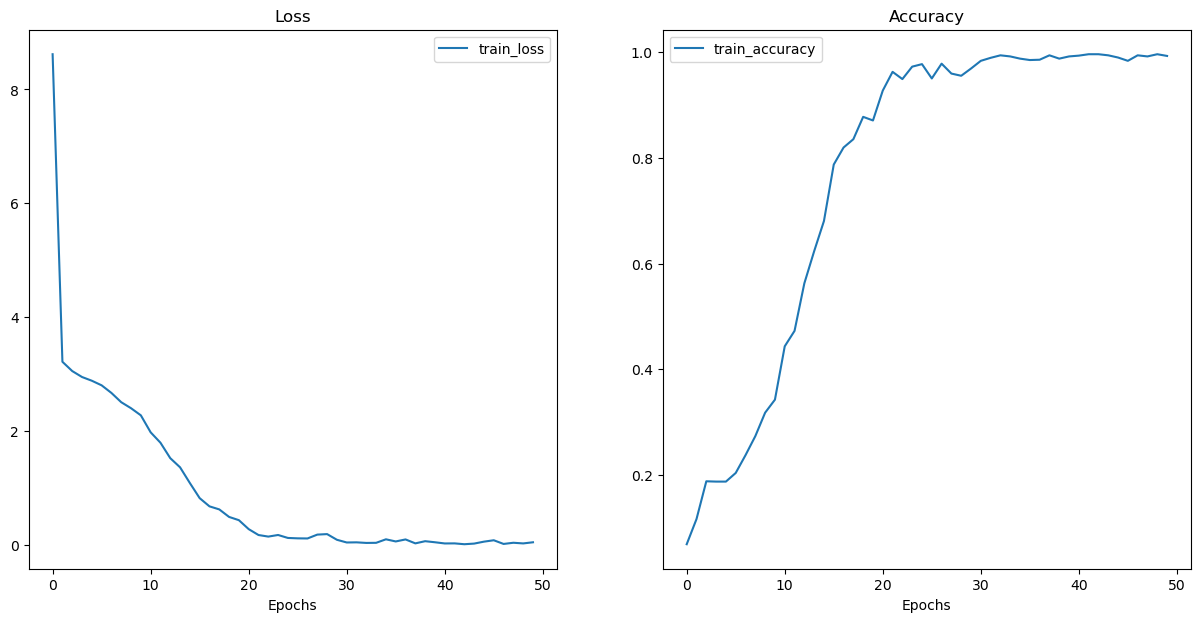

In [22]:
loss = model_0_results["train_loss"]

accuracy = model_0_results["train_acc"]

epochs = range(len(model_0_results["train_loss"]))

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="train_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="train_accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend()